In [1]:
# Importing necessary packages and loading the dataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from google.colab import files


# Read the CSV file into a DataFrame named 'iris_df'
iris_df = pd.read_csv("/content/iris (1).csv")

# Display the first few rows
print(iris_df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [2]:
# Check the class distribution
print("Original Class Distribution:\n", iris_df["species"].value_counts())


Original Class Distribution:
 species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


**Missing values**

In [3]:
# Checking for missing values
iris_df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


**Data Types**

In [4]:
# Check the data types of all columns
print(iris_df.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [5]:
# Data type conversion
# Convert 'species' to categorical if not already
iris_df['species'] = iris_df['species'].astype('category')

In [6]:
iris_df.shape

(150, 5)

**Duplicates**

In [7]:
# Removing duplicates
iris_df = iris_df.drop_duplicates()

**Shape of dataset after removing the duplicates**

In [8]:
iris_df.shape # Shape after checking the duplicates

(147, 5)

In [9]:
iris_df['species'].value_counts()

,count
species,
versicolor,50
virginica,49
setosa,48


**Outliers**

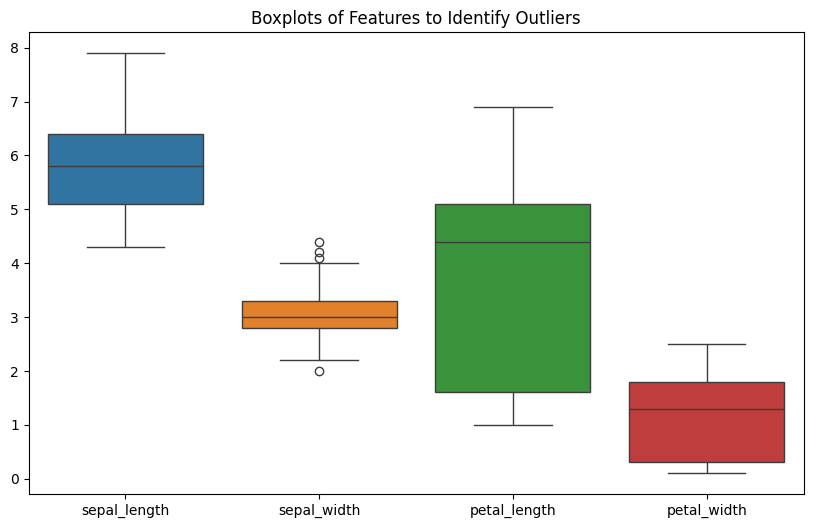

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting box plots for each feature to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
plt.title("Boxplots of Features to Identify Outliers")
plt.show()


In [11]:
#  Handling outliers
# Calculate Q1, Q3, and IQR for each feature
Q1 = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].quantile(0.25)
Q3 = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds for capping
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Identify and count outliers
outliers = ((iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] < lower_bound) |
            (iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] > upper_bound))
outliers_count = outliers.sum()
print("Outliers in each column:\n", outliers_count)

# Step 4: Capping values using the calculated lower and upper bounds
iris_df_capped = iris_df.copy()

# Clip each feature in the dataset
for column in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    iris_df_capped[column] = iris_df_capped[column].clip(lower=lower_bound[column], upper=upper_bound[column])

# Display the capped DataFrame
print(iris_df_capped.head())


Outliers in each column:
 sepal_length    0
sepal_width     4
petal_length    0
petal_width     0
dtype: int64
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


**Correlation matrix**

In [12]:
# Exclude non-numeric columns (e.g., species column)
numeric_iris_df = iris_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numeric columns only
correlation_matrix = numeric_iris_df.corr()

# Display the correlation matrix
print(correlation_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109321      0.871305     0.817058
sepal_width      -0.109321     1.000000     -0.421057    -0.356376
petal_length      0.871305    -0.421057      1.000000     0.961883
petal_width       0.817058    -0.356376      0.961883     1.000000


**Visualizations of features**

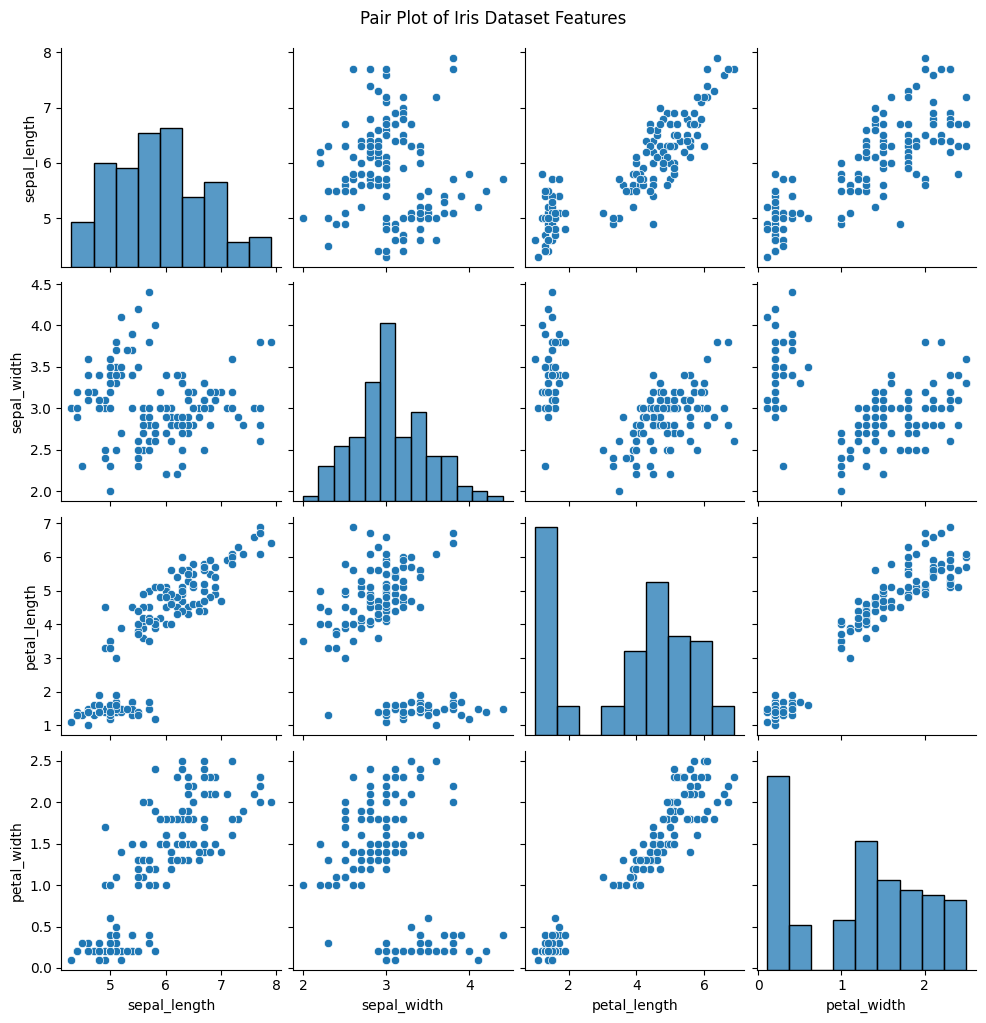

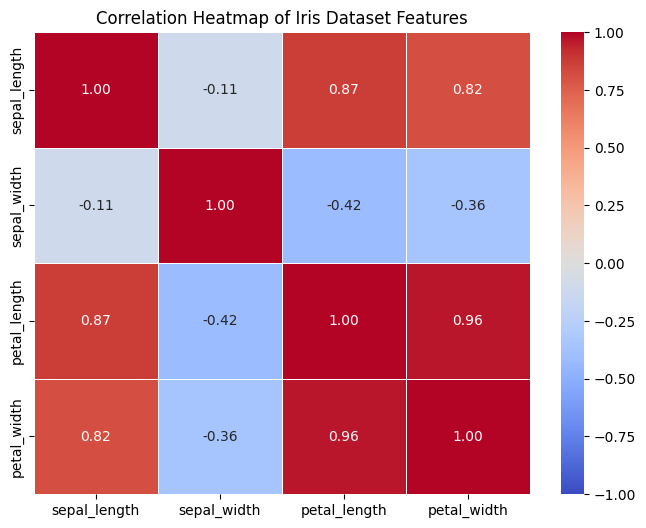

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot to visualize the relationships between all features
sns.pairplot(iris_df)
plt.suptitle("Pair Plot of Iris Dataset Features", y=1.02)
plt.show()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Iris Dataset Features')
plt.show()

At first we removed the features. But this yields poor results. So, we are not removing the results.



**Generating Imbalance data**

In [14]:
print(iris_df.columns)


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [15]:
print(iris_df['species'].unique())
print(iris_df['species'].dtype)


['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']
category


In [16]:
from sklearn.preprocessing import LabelEncoder

# Label encode the species column
label_encoder = LabelEncoder()
iris_df['species'] = label_encoder.fit_transform(iris_df['species'])

# Now you can use numeric values (0, 1, 2) to split the dataset
setosa = iris_df[iris_df['species'] == 0]
versicolor = iris_df[iris_df['species'] == 1]
virginica = iris_df[iris_df['species'] == 2]


In [17]:
print(f"Setosa samples before imbalance: {len(setosa)}")
print(f"Versicolor samples before imbalance: {len(versicolor)}")
print(f"Virginica samples before imbalance: {len(virginica)}")


Setosa samples before imbalance: 48
Versicolor samples before imbalance: 50
Virginica samples before imbalance: 49


In [18]:
print("Original Iris Dataset Columns:", iris_df.columns)


Original Iris Dataset Columns: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [19]:
import seaborn as sns
import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder

# Load the Iris dataset
iris_df = sns.load_dataset("iris")

# Apply LabelEncoder to the 'species' column
label_encoder = LabelEncoder()
iris_df['species'] = label_encoder.fit_transform(iris_df['species'])

# Feature and target selection
X = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris_df['species']

# Function to generate imbalanced data
def generate_imbalanced_data(n_minority, p_minority, p_majority, p_class):
    """
    Generates a slightly imbalanced dataset based on specified proportions.
    n_minority: Number of minority class instances.
    p_minority: Proportion of the minority class.
    p_majority: Proportion of the majority class.
    p_class: Proportion of the third class.
    """
    # Splitting the dataset into classes
    majority_class = iris_df[iris_df["species"] == 0]  # setosa
    minority_class = iris_df[iris_df["species"] == 1]  # versicolor
    other_class = iris_df[iris_df["species"] == 2]  # virginica

    # Create the imbalanced dataset by reducing the number of minority class instances
    minority_class_undersampled = resample(minority_class, replace=False, n_samples=n_minority, random_state=42)
    majority_class_undersampled = resample(majority_class, replace=True, n_samples=int(n_minority * p_majority), random_state=42)
    other_class_undersampled = resample(other_class, replace=True, n_samples=int(n_minority * p_class), random_state=42)

    # Combine into a single imbalanced dataset
    slightly_imbalanced_df = pd.concat([minority_class_undersampled, majority_class_undersampled, other_class_undersampled])

    return slightly_imbalanced_df

# Apply imbalance with specified parameters
slightly_imbalanced_df = generate_imbalanced_data(50, 0.5, 0.3, 0.2)

# To ensure all features are still present
print("Fixed Columns in slightly_imbalanced_df:", slightly_imbalanced_df.columns)


Fixed Columns in slightly_imbalanced_df: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [20]:
print("Class Distribution in Slightly Imbalanced Dataset:")
print(slightly_imbalanced_df['species'].value_counts())


Class Distribution in Slightly Imbalanced Dataset:
species
1    50
0    15
2    10
Name: count, dtype: int64


In [21]:
print("Current Columns in slightly_imbalanced_df:", slightly_imbalanced_df.columns)


Current Columns in slightly_imbalanced_df: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


**Working with Slighltly Imblanace data**

In [22]:
slightly_imbalanced_df.shape

(75, 5)

In [23]:
from sklearn.model_selection import train_test_split

# Extract features using existing column names
X = slightly_imbalanced_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = slightly_imbalanced_df['species']

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Verify class distribution in training set
print("\nClass Distribution in Training Set:")
print(pd.Series(y_train).value_counts())



Class Distribution in Training Set:
species
1    35
0    10
2     7
Name: count, dtype: int64


**Baseline Model**

In [24]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Define models
models = {
    'Dummy Classifier': DummyClassifier(strategy='most_frequent'),  # Baseline Model
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    print("="*50)
    print(f"Training {name}...")
    model.fit(X_train, y_train)  # Training the model
    y_pred = model.predict(X_test)  # Predicting on test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculating the accuracy
    f1 = f1_score(y_test, y_pred, average='weighted')  # Calculate weighted F1-score

    # Print performance metrics
    print(f"\n🔹 Accuracy for {name}: {accuracy:.2f}")
    print(f"🔹 F1 Score for {name}: {f1:.2f}")
    print(f"\n🔹 Classification Report for {name}:\n{classification_report(y_test, y_pred, zero_division=1)}")

    results[name] = {'Accuracy': accuracy, 'F1-Score': f1}

# Print overall results
print("\n\n📊 Model Performance Comparison:")
print("="*50)
for model_name, metrics in results.items():
    print(f"✅ {model_name}: Accuracy = {metrics['Accuracy']:.2f}, F1-Score = {metrics['F1-Score']:.2f}")



Training Dummy Classifier...

🔹 Accuracy for Dummy Classifier: 0.65
🔹 F1 Score for Dummy Classifier: 0.51

🔹 Classification Report for Dummy Classifier:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         5
           1       0.65      1.00      0.79        15
           2       1.00      0.00      0.00         3

    accuracy                           0.65        23
   macro avg       0.88      0.33      0.26        23
weighted avg       0.77      0.65      0.51        23

Training Logistic Regression...

🔹 Accuracy for Logistic Regression: 0.87
🔹 F1 Score for Logistic Regression: 0.81

🔹 Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91        15
           2       1.00      0.00      0.00         3

    accuracy                           0.87        23
   macro avg       0.94      

**Feature Engineering**

I did feature engineering , like added features and then polynomail features, but i did not see nay improvements in the baseline model after running each technique. Hence, removed those. Furthermore, as discussed we need to keep originality for the paper(Feature engineering can be different for different dataset.

**Cross Validation for baseline - models**

In [ ]:
'''from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pandas as pd
import numpy as np

# Simulating a slightly imbalanced dataset (similar to Iris dataset)
np.random.seed(42)
iris_data = {
    'sepal_width': np.random.uniform(2.0, 4.4, 100),
    'petal_width': np.random.uniform(0.1, 2.5, 100),
    'species': np.random.choice(['setosa', 'versicolor', 'virginica'], size=100, p=[0.2, 0.5, 0.3])
}
slightly_imbalanced_df = pd.DataFrame(iris_data)

# Features and Target
X = slightly_imbalanced_df[['sepal_width', 'petal_width']]
y = slightly_imbalanced_df['species']

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

# Cross-validation results
cv_results = {}

# Perform 5-Fold Cross-Validation for each model
for name, model in models.items():
    print(f"Performing Cross-Validation for {name}...")
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # 5-Fold CV
    mean_accuracy = np.mean(scores)
    std_accuracy = np.std(scores)

    # Store results
    cv_results[name] = {
        'Mean Accuracy': mean_accuracy,
        'Standard Deviation': std_accuracy
    }

# Convert results to DataFrame for comparison
cv_results_df = pd.DataFrame(cv_results).T

# Display the cross-validation results
print("\nCross-Validation Results:")
print(cv_results_df)
'''

'from sklearn.model_selection import cross_val_score\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.svm import SVC\nimport pandas as pd\nimport numpy as np\n\n# Simulating a slightly imbalanced dataset (similar to Iris dataset)\nnp.random.seed(42)\niris_data = {\n    \'sepal_width\': np.random.uniform(2.0, 4.4, 100),\n    \'petal_width\': np.random.uniform(0.1, 2.5, 100),\n    \'species\': np.random.choice([\'setosa\', \'versicolor\', \'virginica\'], size=100, p=[0.2, 0.5, 0.3])\n}\nslightly_imbalanced_df = pd.DataFrame(iris_data)\n\n# Features and Target\nX = slightly_imbalanced_df[[\'sepal_width\', \'petal_width\']]\ny = slightly_imbalanced_df[\'species\']\n\n# Define models\nmodels = {\n    \'Logistic Regression\': LogisticRegression(max_iter=200),\n    \'Random Forest\': RandomForestClassifier(),\n    \'Decision Tree\': DecisionTreeClassifier(),\n    \'SVM\': SV

**Model Performance:**

Logistic Regression and SVM are the best performers in terms of both accuracy and consistency.

Random Forest performs decently but is less stable than Logistic Regression and SVM (higher standard deviation).

Decision Tree performs the worst, with both low accuracy and high variability, indicating it struggles with the dataset.

Isusues can be feature selection and class imblalance.

In [25]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


**Original models(without applying any sampling techniques)**

NameError: name 'StandardScaler' is not defined

In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier

# Feature selection based on column names
X = slightly_imbalanced_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = slightly_imbalanced_df['species']

# Split dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define models to test
models = {
    "Dummy Classifier (Baseline)": DummyClassifier(strategy='most_frequent'),  # Baseline Model
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000, class_weight="balanced"),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight="balanced"),
    "SVM": SVC(random_state=42, class_weight="balanced"),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gaussian Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "Balanced Random Forest": BalancedRandomForestClassifier(random_state=42),
    "Easy Ensemble": EasyEnsembleClassifier(random_state=42),
}

# Function to evaluate models on the original (non-resampled) dataset
def evaluate_models_original(X_train, y_train, X_test, y_test):
    results = {}

    # Loop through all models and evaluate them
    for model_name, model in models.items():
        print("="*60)
        print(f"🔹 Evaluating Model: {model_name}")

        # Train the model on the original training set
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Calculate accuracy, F1-score, precision, recall
        accuracy = accuracy_score(y_test, y_pred)
        f1_score_weighted = classification_report(y_test, y_pred, output_dict=True, zero_division=0)['weighted avg']['f1-score']
        precision = classification_report(y_test, y_pred, output_dict=True, zero_division=0)['weighted avg']['precision']
        recall = classification_report(y_test, y_pred, output_dict=True, zero_division=0)['weighted avg']['recall']

        # Store results in the dictionary
        results[model_name] = {
            "Accuracy": accuracy,
            "F1-Score": f1_score_weighted,
            "Precision": precision,
            "Recall": recall,
            "Classification Report": classification_report(y_test, y_pred, zero_division=0),
            "Confusion Matrix": confusion_matrix(y_test, y_pred)
        }

        # Print results
        print(f"\n✅ Accuracy: {accuracy:.4f}")
        print(f"✅ F1-Score: {f1_score_weighted:.4f}")
        print(f"✅ Precision: {precision:.4f}")
        print(f"✅ Recall: {recall:.4f}")
        print("\n📌 Classification Report:")
        print(classification_report(y_test, y_pred, zero_division=0))
        print("\n📌 Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))

    return results

# Run model evaluations on the original data (no resampling)
results_original = evaluate_models_original(X_train, y_train, X_test, y_test)

# Print Summary
print("\n\n📊 Model Performance Comparison (Original Dataset):")
print("="*60)
for model_name, metrics in results_original.items():
    print(f"🔹 {model_name}")
    print(f"   ✅ Accuracy: {metrics['Accuracy']:.4f}")
    print(f"   ✅ F1-Score: {metrics['F1-Score']:.4f}")
    print(f"   ✅ Precision: {metrics['Precision']:.4f}")
    print(f"   ✅ Recall: {metrics['Recall']:.4f}")
    print("="*60)


🔹 Evaluating Model: Dummy Classifier (Baseline)

✅ Accuracy: 0.6522
✅ F1-Score: 0.5149
✅ Precision: 0.4253
✅ Recall: 0.6522

📌 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.65      1.00      0.79        15
           2       0.00      0.00      0.00         3

    accuracy                           0.65        23
   macro avg       0.22      0.33      0.26        23
weighted avg       0.43      0.65      0.51        23


📌 Confusion Matrix:
[[ 0  5  0]
 [ 0 15  0]
 [ 0  3  0]]
🔹 Evaluating Model: Logistic Regression

✅ Accuracy: 0.9565
✅ F1-Score: 0.9529
✅ Precision: 0.9592
✅ Recall: 0.9565

📌 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.94      1.00      0.97        15
           2       1.00      0.67      0.80         3

    accuracy                           0.96        

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:06:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



✅ Accuracy: 1.0000
✅ F1-Score: 1.0000
✅ Precision: 1.0000
✅ Recall: 1.0000

📌 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23


📌 Confusion Matrix:
[[ 5  0  0]
 [ 0 15  0]
 [ 0  0  3]]
🔹 Evaluating Model: CatBoost

✅ Accuracy: 0.9565
✅ F1-Score: 0.9529
✅ Precision: 0.9592
✅ Recall: 0.9565

📌 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.94      1.00      0.97        15
           2       1.00      0.67      0.80         3

    accuracy                           0.96        23
   macro avg       0.98      0.89      0.92        23
we

In [34]:
# Convert dictionary to DataFrame
results_df = pd.DataFrame([
    {"Model": model_name, **metrics} for model_name, metrics in results_original.items()
])

# Print only the 'Model' and 'F1-Score' columns
print("Original Data F1 Scores:\n", results_df[['Model', 'F1-Score']])



Original Data F1 Scores:
                           Model  F1-Score
0   Dummy Classifier (Baseline)  0.514874
1           Logistic Regression  0.952875
2                 Decision Tree  0.894022
3                 Random Forest  1.000000
4                           SVM  0.952875
5                           KNN  0.894022
6          Gaussian Naive Bayes  0.952875
7             Gradient Boosting  0.894022
8                       XGBoost  1.000000
9                      LightGBM  1.000000
10                     CatBoost  0.952875
11                  Extra Trees  0.952875
12       Balanced Random Forest  1.000000
13                Easy Ensemble  1.000000


**Cross Validation for Original models**

In [35]:
# Import necessary libraries for cross-validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define number of folds for cross-validation
num_folds = 5

# Initialize Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Dictionary to store cross-validation results
cv_results = {}

# Perform cross-validation for each model
for model_name, model in models.items():
    print(f"\nPerforming Cross-Validation for: {model_name}")

    # Compute cross-validation scores
    accuracy_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    f1_scores = cross_val_score(model, X, y, cv=skf, scoring='f1_weighted')
    precision_scores = cross_val_score(model, X, y, cv=skf, scoring='precision_weighted')
    recall_scores = cross_val_score(model, X, y, cv=skf, scoring='recall_weighted')

    # Store average metrics across folds
    cv_results[model_name] = {
        "Mean Accuracy": np.mean(accuracy_scores),
        "Mean F1-Score": np.mean(f1_scores),
        "Mean Precision": np.mean(precision_scores),
        "Mean Recall": np.mean(recall_scores)
    }

# Convert results into a DataFrame for better readability
cv_results_df = pd.DataFrame(cv_results).T

# Display the cross-validation results
print("\nCross-Validation Results (Mean Scores Across 5 Folds):")
print(cv_results_df)



Performing Cross-Validation for: Dummy Classifier (Baseline)

Performing Cross-Validation for: Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


Performing Cross-Validation for: Decision Tree

Performing Cross-Validation for: Random Forest

Performing Cross-Validation for: SVM

Performing Cross-Validation for: KNN


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Performing Cross-Validation for: Gaussian Naive Bayes

Performing Cross-Validation for: Gradient Boosting

Performing Cross-Validation for: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:08:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:08:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:08:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:08:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:08:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


Performing Cross-Validation for: LightGBM

Performing Cross-Validation for: CatBoost

Performing Cross-Validation for: Extra Trees

Performing Cross-Validation for: Balanced Random Forest

Performing Cross-Validation for: Easy Ensemble

Cross-Validation Results (Mean Scores Across 5 Folds):
                             Mean Accuracy  Mean F1-Score  Mean Precision  \
Dummy Classifier (Baseline)       0.666667       0.533333        0.444444   
Logistic Regression               0.946667       0.948707        0.965657   
Decision Tree                     0.973333       0.976296        0.986667   
Random Forest                     0.973333       0.976296        0.986667   
SVM                               0.946667       0.948707        0.965657   
KNN                               0.960000       0.945974        0.938990   
Gaussian Naive Bayes              0.946667       0.945820        0.962424   
Gradient Boosting                 0.973333       0.976296        0.986667   
XGBoost       

**Models with Imbalance techniques**

In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier, RUSBoostClassifier
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss, ClusterCentroids, TomekLinks
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have slightly_imbalanced_df with the correct imbalance

# Feature selection based on column names
X = slightly_imbalanced_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = slightly_imbalanced_df['species']

# Split dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define models to test
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000, class_weight="balanced"),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight="balanced"),
    "SVM": SVC(random_state=42, class_weight="balanced"),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gaussian Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "Balanced Random Forest": BalancedRandomForestClassifier(random_state=42),
    "Easy Ensemble": EasyEnsembleClassifier(random_state=42),
    #"RUSBoost": RUSBoostClassifier(random_state=42)
}

# Define imbalance handling techniques
imbalance_methods = {
    "SMOTE": SMOTE(random_state=42),
    "Random Oversampling": RandomOverSampler(random_state=42),
    "Borderline-SMOTE": BorderlineSMOTE(random_state=42),
    "Random Undersampling": RandomUnderSampler(random_state=42),
    "Tomek Links": TomekLinks(),
    "Cluster Centroids": ClusterCentroids(random_state=42),
    "NearMiss": NearMiss(version=1)
}

# Function to evaluate models with different resampling techniques
def evaluate_models(X_train, y_train, X_test, y_test):
    results = {}

    for method_name, sampler in imbalance_methods.items():
        print(f"\nEvaluating Resampling Method: {method_name}")

        # Apply resampling technique
        if sampler is None:
            X_resampled, y_resampled = X_train, y_train
        else:
            X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

        for model_name, model in models.items():
            model.fit(X_resampled, y_resampled)

            # Predict on the test set
            y_pred = model.predict(X_test)

            # Evaluate the model
            accuracy = accuracy_score(y_test, y_pred)
            f1_score = classification_report(y_test, y_pred, output_dict=True, zero_division=0)['weighted avg']['f1-score']
            report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
            confusion = confusion_matrix(y_test, y_pred)

            # Store results
            results[(method_name, model_name)] = {
                "Accuracy": accuracy,
                "F1-Score": f1_score,
                "Classification Report": report,
                "Confusion Matrix": confusion
            }

            # Print summary
            print(f"\nModel: {model_name}")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"F1-Score: {f1_score:.4f}")
            print("Classification Report:")
            print(classification_report(y_test, y_pred, zero_division=0))
            print("Confusion Matrix:")
            print(confusion)

    return results

# Run model evaluations
results = evaluate_models(X_train, y_train, X_test, y_test)



Evaluating Resampling Method: SMOTE

Model: Logistic Regression
Accuracy: 0.9565
F1-Score: 0.9529
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.94      1.00      0.97        15
           2       1.00      0.67      0.80         3

    accuracy                           0.96        23
   macro avg       0.98      0.89      0.92        23
weighted avg       0.96      0.96      0.95        23

Confusion Matrix:
[[ 5  0  0]
 [ 0 15  0]
 [ 0  1  2]]

Model: Decision Tree
Accuracy: 0.9130
F1-Score: 0.8940
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.88      1.00      0.94        15
           2       1.00      0.33      0.50         3

    accuracy                           0.91        23
   macro avg       0.96      0.78      0.81        23
weighted avg       0.92      0.91    

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:40:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: CatBoost
Accuracy: 1.0000
F1-Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23

Confusion Matrix:
[[ 5  0  0]
 [ 0 15  0]
 [ 0  0  3]]

Model: Extra Trees
Accuracy: 0.9565
F1-Score: 0.9529
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.94      1.00      0.97        15
           2       1.00      0.67      0.80         3

    accuracy                           0.96        23
   macro avg       0.98      0.89      0.92        23
weighted avg       0.96      0.96      0.95        23

Confusion Matrix:
[[ 5  0  0]
 [

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:40:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 1.0000
F1-Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23

Confusion Matrix:
[[ 5  0  0]
 [ 0 15  0]
 [ 0  0  3]]

Model: LightGBM
Accuracy: 1.0000
F1-Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23

Confusion Matrix:
[[ 5  0  0]
 [ 0 1

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:40:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: CatBoost
Accuracy: 1.0000
F1-Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23

Confusion Matrix:
[[ 5  0  0]
 [ 0 15  0]
 [ 0  0  3]]

Model: Extra Trees
Accuracy: 1.0000
F1-Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23

Confusion Matrix:
[[ 5  0  0]
 [

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:40:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: CatBoost
Accuracy: 1.0000
F1-Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23

Confusion Matrix:
[[ 5  0  0]
 [ 0 15  0]
 [ 0  0  3]]

Model: Extra Trees
Accuracy: 1.0000
F1-Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23

Confusion Matrix:
[[ 5  0  0]
 [

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:40:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: CatBoost
Accuracy: 1.0000
F1-Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23

Confusion Matrix:
[[ 5  0  0]
 [ 0 15  0]
 [ 0  0  3]]

Model: Extra Trees
Accuracy: 1.0000
F1-Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23

Confusion Matrix:
[[ 5  0  0]
 [

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:40:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: CatBoost
Accuracy: 1.0000
F1-Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23

Confusion Matrix:
[[ 5  0  0]
 [ 0 15  0]
 [ 0  0  3]]

Model: Extra Trees
Accuracy: 1.0000
F1-Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23

Confusion Matrix:
[[ 5  0  0]
 [

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:40:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: CatBoost
Accuracy: 0.4348
F1-Score: 0.4172
Classification Report:
              precision    recall  f1-score   support

           0       0.31      1.00      0.48         5
           1       0.67      0.27      0.38        15
           2       1.00      0.33      0.50         3

    accuracy                           0.43        23
   macro avg       0.66      0.53      0.45        23
weighted avg       0.63      0.43      0.42        23

Confusion Matrix:
[[ 5  0  0]
 [11  4  0]
 [ 0  2  1]]

Model: Extra Trees
Accuracy: 0.9130
F1-Score: 0.9107
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.93      0.93      0.93        15
           2       1.00      0.67      0.80         3

    accuracy                           0.91        23
   macro avg       0.92      0.87      0.88        23
weighted avg       0.92      0.91      0.91        23

Confusion Matrix:
[[ 5  0  0]
 [

**Full Metrices for each model and Imblanace technique**

In [37]:
import pandas as pd

# Increase the maximum number of rows and columns to display
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Automatically adjust width

# Convert results into a structured DataFrame
results_list = []

for (resampling_method, model_name), metrics in results.items():
    # Ensure that the classification report is a dictionary
    report = metrics["Classification Report"]["weighted avg"]

    row = {
        "Resampling Method": resampling_method,
        "Model": model_name,
        "Accuracy": metrics["Accuracy"],
        "F1-Score": report.get("f1-score", None),  # Safely access the value
        "Precision": report.get("precision", None),  # Safely access the value
        "Recall": report.get("recall", None)  # Safely access the value
    }
    results_list.append(row)

# Convert to DataFrame
results_df = pd.DataFrame(results_list)

# Display the cleaned DataFrame
from IPython.display import display
display(results_df)

# Optionally, if the display is still too large, you can use this to view a subset
# display(results_df.head(20))  # Shows the first 20 rows


,Resampling Method,Model,Accuracy,F1-Score,Precision,Recall
0,SMOTE,Logistic Regression,0.956522,0.952875,0.959239,0.956522
1,SMOTE,Decision Tree,0.913043,0.894022,0.923274,0.913043
2,SMOTE,Random Forest,1.000000,1.000000,1.000000,1.000000
3,SMOTE,SVM,0.956522,0.952875,0.959239,0.956522
4,SMOTE,KNN,0.913043,0.894022,0.923274,0.913043
5,SMOTE,Gaussian Naive Bayes,0.956522,0.952875,0.959239,0.956522
6,SMOTE,Gradient Boosting,0.913043,0.894022,0.923274,0.913043
7,SMOTE,XGBoost,1.000000,1.000000,1.000000,1.000000
8,SMOTE,LightGBM,1.000000,1.000000,1.000000,1.000000
9,SMOTE,CatBoost,1.000000,1.000000,1.000000,1.000000


**`Results Visualization plots`**

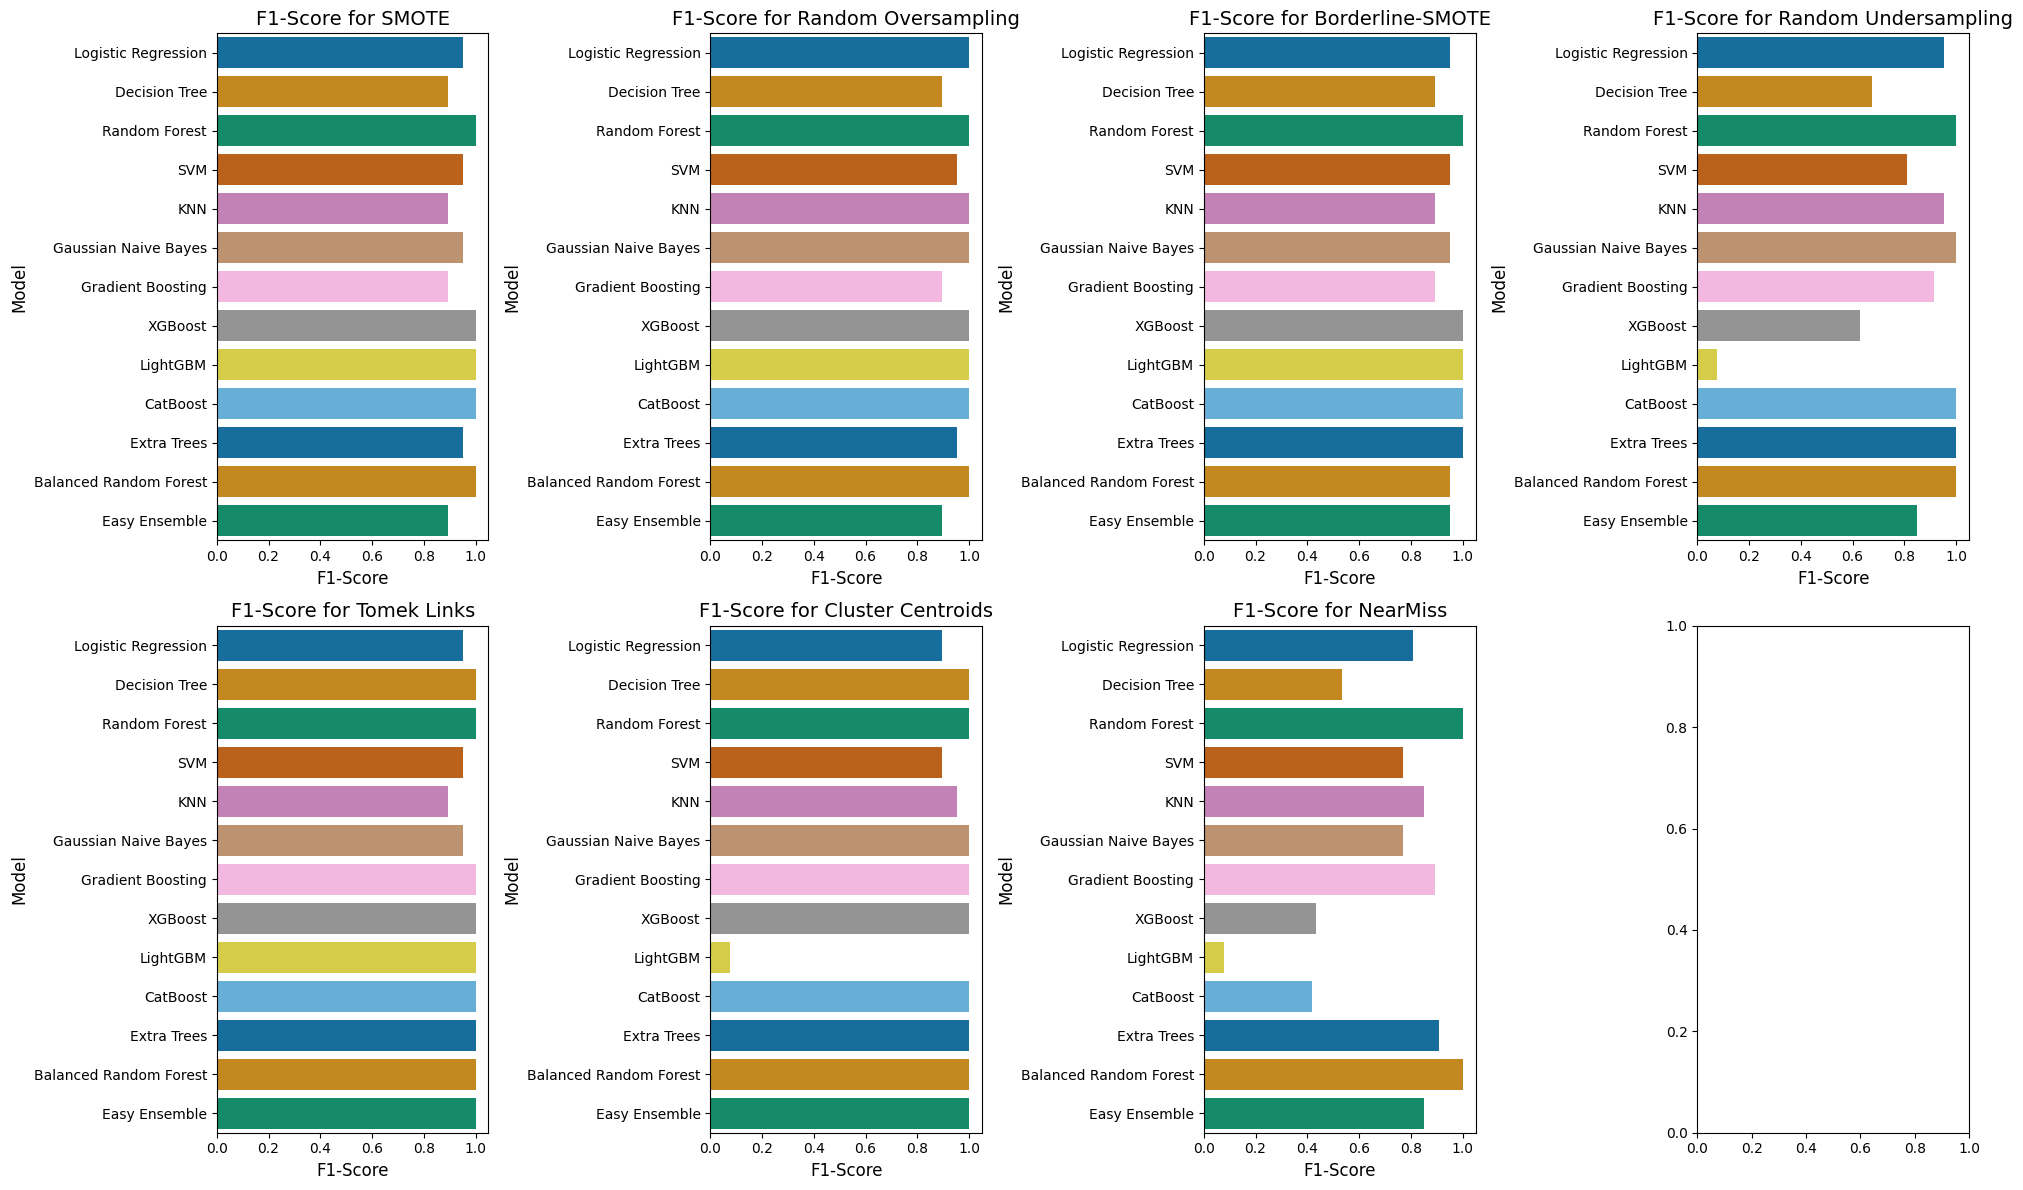

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create the plot with subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))  # Adjust rows/columns as needed
axes = axes.flatten()

# List of resampling methods (excluding "Original Data")
resampling_methods = results_df[results_df['Resampling Method'] != "Original Data"]['Resampling Method'].unique()

# Plot each resampling method
for ax, method in zip(axes, resampling_methods):
    # Filter data for the specific resampling method
    method_data = results_df[results_df['Resampling Method'] == method]

    if method_data.empty:  # Check if method_data has any entries
        continue  # Skip empty method data

    # Create the barplot using color-blind-friendly palette
    sns.barplot(x='F1-Score', y='Model', data=method_data, ax=ax, palette="colorblind")

    # Set the title and labels
    ax.set_title(f"F1-Score for {method}", fontsize=14)
    ax.set_xlabel('F1-Score', fontsize=12)
    ax.set_ylabel('Model', fontsize=12)

# **Remove grid lines from all subplots**
for ax in axes:
    ax.grid(False)  # <-- This removes the grid lines

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the final plot
plt.show()


**Cross validation for model with Imbalance techniques**

In [39]:
# Import necessary libraries for cross-validation
from sklearn.model_selection import StratifiedKFold, cross_val_score
import warnings

warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

# Define number of folds for cross-validation
num_folds = 5

# Initialize Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Dictionary to store cross-validation results
cv_results = {}

# Perform cross-validation for each imbalance method
for method_name, sampler in imbalance_methods.items():
    print(f"\nPerforming Cross-Validation with Resampling: {method_name}")

    # Apply resampling technique
    X_resampled, y_resampled = sampler.fit_resample(X, y)

    # Perform cross-validation for each model
    for model_name, model in models.items():
        print(f" - Evaluating Model: {model_name}")

        # Compute cross-validation scores
        accuracy_scores = cross_val_score(model, X_resampled, y_resampled, cv=skf, scoring='accuracy')
        f1_scores = cross_val_score(model, X_resampled, y_resampled, cv=skf, scoring='f1_weighted')
        precision_scores = cross_val_score(model, X_resampled, y_resampled, cv=skf, scoring='precision_weighted')
        recall_scores = cross_val_score(model, X_resampled, y_resampled, cv=skf, scoring='recall_weighted')

        # Store average metrics across folds
        cv_results[(method_name, model_name)] = {
            "Mean Accuracy": np.mean(accuracy_scores),
            "Mean F1-Score": np.mean(f1_scores),
            "Mean Precision": np.mean(precision_scores),
            "Mean Recall": np.mean(recall_scores)
        }

# Convert results into a DataFrame for better readability
cv_results_df = pd.DataFrame(cv_results).T

# Display the cross-validation results
print("\nCross-Validation Results (Mean Scores Across 5 Folds):")
print(cv_results_df)



Performing Cross-Validation with Resampling: SMOTE
 - Evaluating Model: Logistic Regression
 - Evaluating Model: Decision Tree
 - Evaluating Model: Random Forest
 - Evaluating Model: SVM
 - Evaluating Model: KNN
 - Evaluating Model: Gaussian Naive Bayes
 - Evaluating Model: Gradient Boosting
 - Evaluating Model: XGBoost
 - Evaluating Model: LightGBM
 - Evaluating Model: CatBoost
 - Evaluating Model: Extra Trees
 - Evaluating Model: Balanced Random Forest
 - Evaluating Model: Easy Ensemble

Performing Cross-Validation with Resampling: Random Oversampling
 - Evaluating Model: Logistic Regression
 - Evaluating Model: Decision Tree
 - Evaluating Model: Random Forest
 - Evaluating Model: SVM
 - Evaluating Model: KNN
 - Evaluating Model: Gaussian Naive Bayes
 - Evaluating Model: Gradient Boosting
 - Evaluating Model: XGBoost
 - Evaluating Model: LightGBM
 - Evaluating Model: CatBoost
 - Evaluating Model: Extra Trees
 - Evaluating Model: Balanced Random Forest
 - Evaluating Model: Easy Ensem